In [1]:
#Import necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
df.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [4]:
df.shape

(1273, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [6]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1268    False
1269    False
1270    False
1271    False
1272    False
Length: 1273, dtype: bool

### Exploratory Data Analysis

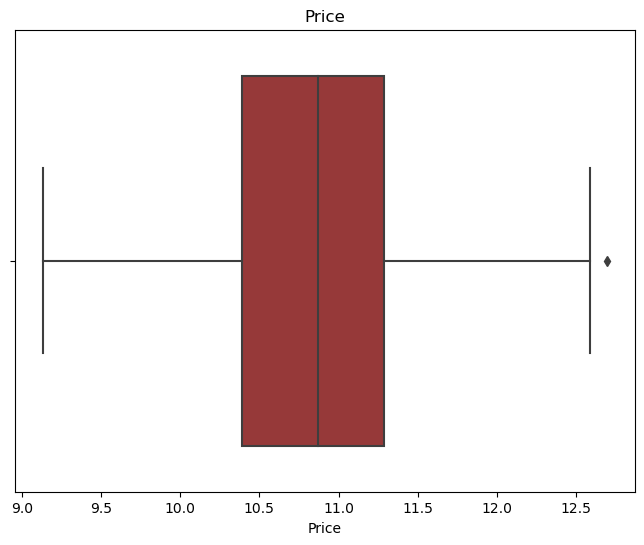

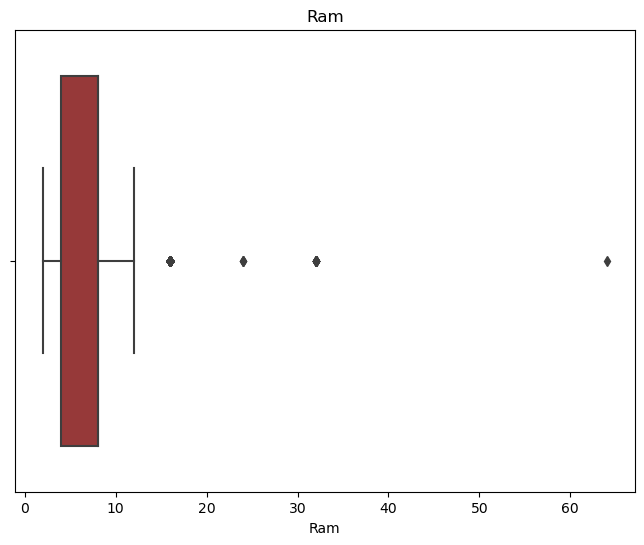

In [8]:
#Box plot of the price, and Ram

for column in ['Price','Ram']:
    plt.figure(figsize = (8,6))
    sns.boxplot(data= df, x = column, color = 'brown')
    plt.title(column)
    plt.xlabel(column)
    plt.show()

<Axes: >

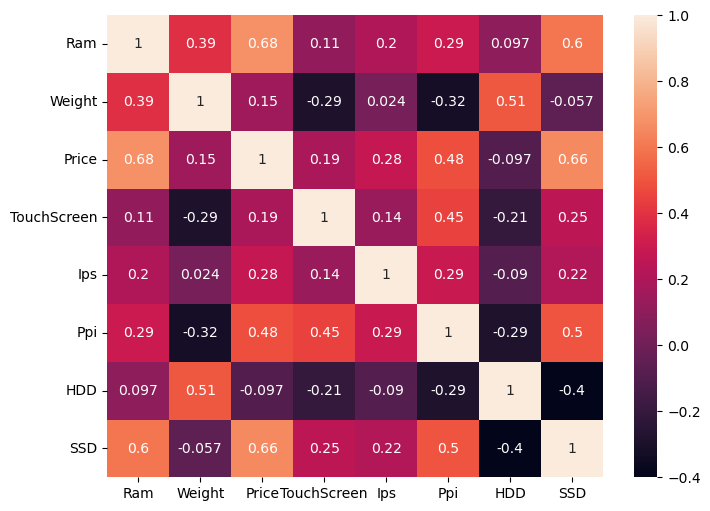

In [9]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr() , annot = True)

- The Ram and SSD have a strong positive correlation with price, by the correlation factor of 0.68 and 0.66 respectively

In [10]:
#Average Price of laptop by Brand

Brand_average_price = df.groupby('Company')['Price'].mean().reset_index(
                            name = 'Average Price').sort_values(by = 'Average Price', ascending = False)

Brand_average_price

,Company,Average Price
14,Razer,11.940528
9,LG,11.621737
11,MSI,11.383340
6,Google,11.374981
13,Microsoft,11.305010
1,Apple,11.274645
8,Huawei,11.235397
15,Samsung,11.173723
16,Toshiba,11.044669
18,Xiaomi,10.995970


In [11]:
#Average Price of laptop by type

Type_average_price = df.groupby('TypeName')['Price'].mean().reset_index(
                            name = 'Average Price').sort_values(by ='Average Price', ascending = False)
Type_average_price

,TypeName,Average Price
5,Workstation,11.666833
1,Gaming,11.340699
4,Ultrabook,11.275749
0,2 in 1 Convertible,11.011526
3,Notebook,10.513711
2,Netbook,10.157738


In [12]:
#Average Price of laptop by the Ram

Ram_average_price = df.groupby('Ram')['Price'].mean().reset_index(
                            name = 'Average Price').sort_values(by ='Average Price', ascending = False)
Ram_average_price

,Ram,Average Price
8,64,12.263341
7,32,12.056283
6,24,11.614669
5,16,11.501623
4,12,11.027605
3,8,10.976748
2,6,10.385115
1,4,10.234429
0,2,9.465896


In [13]:
#Average Price of laptop by the Operating System

Os_average_price = df.groupby('Os')['Price'].mean().reset_index(
                            name = 'Average Price').sort_values(by ='Average Price', ascending = False)
Os_average_price

,Os,Average Price
0,Mac,11.274645
2,Windows,10.900581
1,Others,10.242865


###   Preprocessing

In [14]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [81]:
df.drop(columns = ['Ppi'], axis = 1, inplace = True)

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [108]:
for i in df.columns:
    if df[i].dtype == 'object':
        le.fit_transform(list(df[i].values))
        df[i] = le.fit_transform(df[i].values)
        
        for j in df.columns:
            if df[j].dtype == 'int':
                df[j] = df[j].astype('float64')

In [109]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,11.175755,0,1,2,0,128,1,0
1,1,4,8,1.34,10.776777,0,0,2,0,0,1,0
2,7,3,8,1.86,10.329931,0,0,2,0,256,1,1
3,1,4,16,1.83,11.814476,0,1,3,0,512,0,0
4,1,4,8,1.37,11.473101,0,1,2,0,256,1,0


#### Machine Learning

In [110]:
#Spliting the dataset in to independent and dependent variable

X = df.drop(columns = 'Price')
y = df['Price'].astype(int)

In [100]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,0,1,2,0,128,1,0
1,1,4,8,1.34,0,0,2,0,0,1,0
2,7,3,8,1.86,0,0,2,0,256,1,1
3,1,4,16,1.83,0,1,3,0,512,0,0
4,1,4,8,1.37,0,1,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,4,2.20,0,0,3,500,0,2,2
1269,10,0,4,1.80,1,1,3,0,128,1,2
1270,10,0,16,1.30,1,1,3,0,512,1,2
1271,10,3,2,1.50,0,0,4,0,0,1,2


In [111]:
y

0       11
1       10
2       10
3       11
4       11
        ..
1268    10
1269    10
1270    11
1271     9
1272    10
Name: Price, Length: 1273, dtype: int32

In [113]:
y.unique()

array([11, 10,  9, 12])

In [114]:
from sklearn import utils

print(utils.multiclass.type_of_target(y))

multiclass


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [117]:
classifiers = [[RandomForestClassifier(), 'Random Forest'],[LogisticRegression(), 'Logistic Regression'], [
                        DecisionTreeClassifier(), 'Decision Tree'], [SVC(), 'SVC']]

In [119]:
accuracy_score_li = {}

for i in classifiers:
    model = i[0]
    model_name =i[1]
    model.fit(X_train, y_train)
    
    
    model_predict = model.predict(X_test)
    accuracy = accuracy_score(model_predict, y_test)
    
    accuracy_score_li[model_name] = ([str(round(accuracy * 100, 2)) + '%'])

In [122]:
print('Accuracy Scores')
df2 = pd.DataFrame(accuracy_score_li)
df2

Accuracy Scores


,Random Forest,Logistic Regression,Decision Tree,SVC
0,83.92%,68.24%,80.78%,68.63%


- Random Forest gives us a higher accuracy of 83%

In [124]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           9       0.61      0.41      0.49        27
          10       0.63      0.91      0.75       120
          11       0.85      0.53      0.65       103
          12       0.00      0.00      0.00         5

    accuracy                           0.69       255
   macro avg       0.52      0.46      0.47       255
weighted avg       0.70      0.69      0.67       255



In [125]:
output= pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': model_predict
})

output.to_csv('Prediction.csv', index = False)

In [126]:
prediction_output = pd.read_csv('Prediction.csv')
prediction_output.head(10)

,Actual Price,Predicted Price
0,11,11
1,11,11
2,10,10
3,11,10
4,10,10
5,10,10
6,11,10
7,11,11
8,10,10
9,10,10
